In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

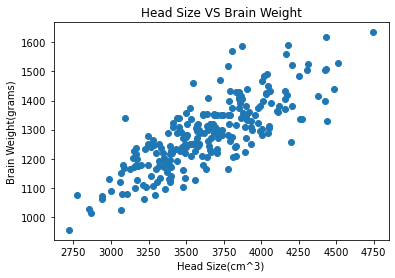

In [2]:
#Loading the data set
data=pd.read_csv('../BrainSize/homo_sapiens/headbrain.csv')
data.head()

# Visualize data
head = "Head Size(cm^3)"
brain = "Brain Weight(grams)"
plt.scatter(data[head], data[brain])
plt.xlabel(head)
plt.ylabel(brain)
plt.title("Head Size VS Brain Weight")
plt.show()

In [3]:
# Train / test splitting dataset
train, test = train_test_split(data,  test_size = 0.2)

# Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train[head])])
y_train = torch.torch.FloatTensor([[x] for x in list(train[brain])])

# Converting test data into tensors for Pytorch
X_test = torch.Tensor([[x] for x in list(test[head])])
y_test = torch.torch.FloatTensor([[x] for x in list(test[brain])])

In [4]:
#Data set & Data set Loader
from torch.utils.data import TensorDataset
train_data=TensorDataset(X_train, y_train)
train_data[0:5]


# Define data loader
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_data, batch_size, shuffle=True)

In [5]:
train_dl

In [6]:
# Define model
model = nn.Linear(1, 1) # nn.Linear(in_features,out_features)
print(model.weight)
print(model.bias)

# printing the model Parameters
print(list(model.parameters()))

#Define the loss function
loss_fun = nn.MSELoss()

# Define SGD optimizer with learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Parameter containing:
tensor([[0.4872]], requires_grad=True)
Parameter containing:
tensor([-0.4627], requires_grad=True)
[Parameter containing:
tensor([[0.4872]], requires_grad=True), Parameter containing:
tensor([-0.4627], requires_grad=True)]


In [7]:
# Utility function to train the model
def lrmodel(num_epochs, model, loss_fun, optimizer, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb, yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
#             import pdb; pdb.set_trace();
            # 2. Calculate loss
            loss = loss_fun(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            optimizer.step()
            
            # 5. Reset the gradients to zero
            optimizer.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

            
#Training for 100 epochs
num_epochs=100
lrmodel(num_epochs, model, loss_fun, optimizer, train_dl)

# Normalize
X_train = (X_train - X_train.mean()) / X_train.std()

# Generate predictions
preds = model(X_train)
preds

Epoch [10/100], Loss: nan
Epoch [20/100], Loss: nan
Epoch [30/100], Loss: nan
Epoch [40/100], Loss: nan
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan


tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

In [8]:
# Compare with targets
y_train

tensor([[1215.],
        [1270.],
        [1405.],
        [1110.],
        [1440.],
        [1142.],
        [1405.],
        [1076.],
        [1215.],
        [1320.],
        [1290.],
        [1296.],
        [1163.],
        [1300.],
        [1127.],
        [1322.],
        [1210.],
        [1380.],
        [1346.],
        [1078.],
        [1250.],
        [1390.],
        [1360.],
        [1468.],
        [1340.],
        [1290.],
        [1302.],
        [1130.],
        [1208.],
        [1210.],
        [1180.],
        [1350.],
        [1315.],
        [1525.],
        [1235.],
        [1173.],
        [1312.],
        [1297.],
        [1364.],
        [1335.],
        [1060.],
        [1160.],
        [1330.],
        [1090.],
        [1249.],
        [1282.],
        [1400.],
        [1256.],
        [1275.],
        [1279.],
        [1290.],
        [1505.],
        [1185.],
        [1300.],
        [1237.],
        [1300.],
        [1105.],
        [1245.],
        [1265.